<center><font size="+4">Generating function analysis of the diffusion approximation to the birth-immigration-death process</font></center>

# Moment generating function

In [1]:
genfunc (x, t, n0, kb, kd) := 
    ((kd * %e^(- (kb - kd) * t) - kd + 
        (kd - kb * %e^(- (kb - kd) * t)) * x) / 
        (kd * %e^(- (kb - kd) * t) - kb + 
        (kb - kb * %e^(- (kb - kd) * t)) * x))^n0;

(%o1) genfunc(x, t, n0, kb, kd) := 
                        (- (kb - kd)) t                   (- (kb - kd)) t
                   kd %e                - kd + (kd - kb %e               ) x n0
                  (---------------------------------------------------------)
                        (- (kb - kd)) t                   (- (kb - kd)) t
                   kd %e                - kb + (kb - kb %e               ) x

Extract the probability distribution

In [2]:
probdist (m, t, n0, kb, kd) :=
block([gf],
    gf : genfunc(z, t, n0, kb, kd),
    makelist([j, subst (0, z, diff(gf, z, j) / (j!))],
        j, 0, m))$

Reparameterize it according to the diffusion approximation.

In [3]:

factor(genfunc(z / N, N * tau, N * x0, D + s/(2*N), D - s/(2*N)));


                             s tau                        2          s tau
(%o3) expt(- (((s - 2 D N) %e      + s + 2 D N) z + (2 D N  - N s) %e
              2                  s tau
 + N s - 2 D N )/(((s + 2 D N) %e      - s - 2 D N) z
                   2    s tau              2
 + ((- N s) - 2 D N ) %e      - N s + 2 D N ), N x0)

In [4]:

renoprob (m, N, tau, x0, D, s) :=
    map (lambda ([pa], [pa[1] / N, pa[2] * N]),
    probdist (m, N * tau, N * x0, D + s/(2*N), D - s/(2*N)))$


Plot with values tau = 1.0, x0 = 3.0, D = 1.0, s = 1.0

In [5]:
set_plot_option([svg_file, "maxplot.svg"])$

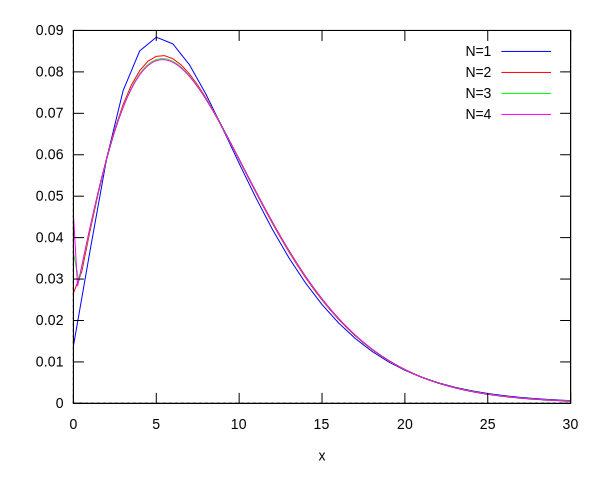

(%o6)             [/tmp/maxout600.gnuplot, /tmp/maxplot.svg]

In [6]:
plot2d([[discrete, renoprob(30, 1, 1.0, 3, 1.0, 1.0)],
    [discrete, renoprob(60, 2, 1.0, 3, 1.0, 1.0)],
    [discrete, renoprob(90, 3, 1.0, 3, 1.0, 1.0)],
    [discrete, renoprob(120, 4, 1.0, 3, 1.0, 1.0)]],
    [legend, "N=1", "N=2", "N=3", "N=4"],
    [xlabel, "x"]);

Check that it is normalized and extract fixation probability.

In [7]:
genfunc(0, t, n0, kb, kd);
factor(genfunc(0, N * tau, N * x0, D + s/(2*N), D - s/(2*N)));
genfunc(1, t, n0, kb, kd);

                                 (kd - kb) t
                            kd %e            - kd n0
(%o7)                      (---------------------)
                                 (kd - kb) t
                            kd %e            - kb

                                         s tau
                          (s - 2 D N) (%e      - 1)    N x0
(%o8)               (- -------------------------------)
                                     s tau
                       (s + 2 D N) %e      + s - 2 D N

(%o9)                                  1

# Functions to compute moments

In [8]:
numop(n, gf) := 
    if n=0 then gf
        else numop(n-1, z * diff(gf, z))$
mom(m, t, n0, kb, kd) := 
    factor(subst(1, z, numop(m, genfunc(z, t, n0, kb, kd))))$
momren(m, t, n0, kb, kd) := 
                factor(psubst([t = N * tau, 
                        n0 = N * x0,
                        kb = D + s/(2*N), 
                        kd = D - s/(2*N)], 
                mom(m, t, n0, kb, kd) / N^m))$
cumu(m, t, n0, kb, kd) := 
    factor(subst(1, z, numop(m, 
            log(genfunc(z, t, n0, kb, kd)))))$
cumuren(m, zt, n0, kb, kd) := 
                factor(psubst([t = N * tau, 
                        n0 = N * x0,
                        kb = D + s/(2*N), 
                        kd = D - s/(2*N)], 
                cumu(m, t, n0, kb, kd) / N^m))$

# Compute cumulants

In [9]:
cumu(1, t, n0, kb, kd);
cumu(2, t, n0, kb, kd);
cumu(3, t, n0, kb, kd);
cumu(4, t, n0, kb, kd);


                                    kb t - kd t
(%o15)                         n0 %e

                                kd t     kb t    kb t - 2 kd t
                (kd + kb) n0 (%e     - %e    ) %e
(%o16)          ----------------------------------------------
                                   kd - kb

              kd t     kb t     2   kd t             kd t     2   kd t
(%o17) (n0 (%e     - %e    ) (kd  %e     + 4 kb kd %e     + kb  %e
          2   kb t             kb t       2   kb t    kb t - 3 kd t           2
    - 2 kd  %e     - 2 kb kd %e     - 2 kb  %e    ) %e             )/(kd - kb)

                        kd t     kb t    kb t - 4 kd t
(%o18) ((kd + kb) n0 (%e     - %e    ) %e
         2   kd t + kb t               kd t + kb t       2   kd t + kb t
 ((- 6 kd  %e           ) - 12 kb kd %e            - 6 kb  %e
     2   2 kd t              2 kd t     2   2 kd t       2   2 kb t
 + kd  %e       + 10 kb kd %e       + kb  %e       + 6 kd  %e
       2   2 kb t            3
 + 6 kb  %e      ))/(kd - kb)

Reparameterize cumulants and collect powers of N.

In [10]:

cumuren(1, t, n0, kb, kd);
cumuren(2, t, n0, kb, kd);


                                    s tau
(%o19)                            %e      x0

                                s tau        s tau
                         2 D (%e      - 1) %e      x0
(%o20)                   ----------------------------
                                      s

In [11]:
block([mo],
    mo : expand(cumuren(3, t, n0, kb, kd)),
    factor(coeff (mo, N, 0)) +
    factor(coeff (mo, N, -2)) / N^2);
block([mo],
    mo : expand(cumuren(4, t, n0, kb, kd)),
    factor(coeff (mo, N, 0)) +
    factor(coeff (mo, N, -2)) / N^2);


          s tau        s tau    s tau              2    s tau     2   s tau
       (%e      - 1) %e      (%e      + 1) x0   6 D  (%e      - 1)  %e      x0
(%o20) -------------------------------------- + ------------------------------
                           2                                   2
                        2 N                                   s

              s tau        s tau      2 s tau
       2 D (%e      - 1) %e      (3 %e        - 2) x0
(%o21) ----------------------------------------------
                             2
                            N  s
                                                    3    s tau     3   s tau
                                                24 D  (%e      - 1)  %e      x0
                                              + -------------------------------
                                                               3
                                                              s

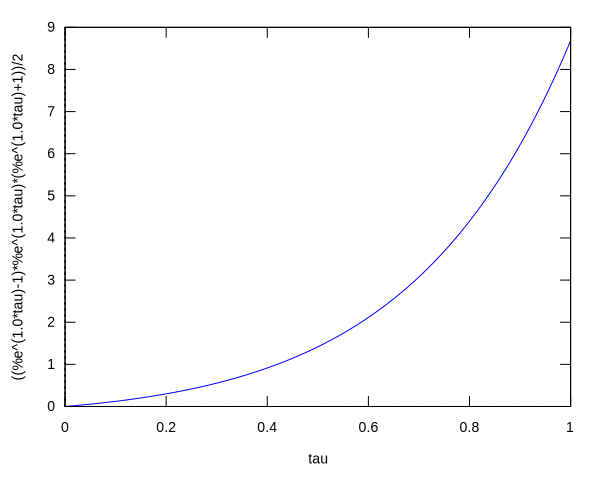

(%o21)            [/tmp/maxout600.gnuplot, /tmp/maxplot.svg]

In [11]:
plot2d(
    subst(1.0, s, 
        (%e^(s*tau)-1)*%e^(s*tau)*(%e^(s*tau)+1)/2),
[tau, 0, 1]);

# Appendix

## Original maxima code

```maxima
/* [wxMaxima batch file version 1] [ DO NOT EDIT BY HAND! ]*/
/* [ Created with wxMaxima version 18.02.0 ] */
/* [wxMaxima: comment start ]
Moment generating function.
   [wxMaxima: comment end   ] */


/* [wxMaxima: input   start ] */
genfunc (x, t, n0, kb, kd) := 
    ((kd * %e^(- (kb - kd) * t) - kd + 
        (kd - kb * %e^(- (kb - kd) * t)) * x) / 
        (kd * %e^(- (kb - kd) * t) - kb + 
        (kb - kb * %e^(- (kb - kd) * t)) * x))^n0;
/* [wxMaxima: input   end   ] */


/* [wxMaxima: comment start ]
Extract the probability distribution.
   [wxMaxima: comment end   ] */


/* [wxMaxima: input   start ] */
probdist (m, t, n0, kb, kd) :=
block([gf],
    gf : genfunc(z, t, n0, kb, kd),
    makelist([j, subst (0, z, diff(gf, z, j) / (j!))],
        j, 0, m))$
/* [wxMaxima: input   end   ] */


/* [wxMaxima: comment start ]
Reparameterize it according to diffusion approximation.
   [wxMaxima: comment end   ] */


/* [wxMaxima: input   start ] */
factor(genfunc(z / N, N * tau, N * x0, D + s/(2*N), D - s/(2*N)));
/* [wxMaxima: input   end   ] */


/* [wxMaxima: input   start ] */
renoprob (m, N, tau, x0, D, s) :=
    map (lambda ([pa], [pa[1] / N, pa[2] * N]),
    probdist (m, N * tau, N * x0, D + s/(2*N), D - s/(2*N)))$
/* [wxMaxima: input   end   ] */


/* [wxMaxima: comment start ]
Plot with values tau = 1.0, x0 = 3.0, D = 1.0, s = 1.0
   [wxMaxima: comment end   ] */


/* [wxMaxima: input   start ] */
wxplot2d([[discrete, renoprob(30, 1, 1.0, 3, 1.0, 1.0)],
    [discrete, renoprob(60, 2, 1.0, 3, 1.0, 1.0)],
    [discrete, renoprob(90, 3, 1.0, 3, 1.0, 1.0)],
    [discrete, renoprob(120, 4, 1.0, 3, 1.0, 1.0)]],
    [legend, "N=1", "N=2", "N=3", "N=4"],
    [xlabel, "x"]);
/* [wxMaxima: input   end   ] */


/* [wxMaxima: comment start ]
Check that it is normalized and extract
fixation probability.
   [wxMaxima: comment end   ] */


/* [wxMaxima: input   start ] */
genfunc(0, t, n0, kb, kd);
factor(genfunc(0, N * tau, N * x0, D + s/(2*N), D - s/(2*N)));
genfunc(1, t, n0, kb, kd);
/* [wxMaxima: input   end   ] */


/* [wxMaxima: comment start ]
Functions to compute moments.
   [wxMaxima: comment end   ] */


/* [wxMaxima: input   start ] */
numop(n, gf) := 
    if n=0 then gf
        else numop(n-1, z * diff(gf, z))$
mom(m, t, n0, kb, kd) := 
    factor(subst(1, z, numop(m, genfunc(z, t, n0, kb, kd))))$
momren(m, t, n0, kb, kd) := 
                factor(psubst([t = N * tau, 
                        n0 = N * x0,
                        kb = D + s/(2*N), 
                        kd = D - s/(2*N)], 
                mom(m, t, n0, kb, kd) / N^m))$
cumu(m, t, n0, kb, kd) := 
    factor(subst(1, z, numop(m, 
            log(genfunc(z, t, n0, kb, kd)))))$
cumuren(m, zt, n0, kb, kd) := 
                factor(psubst([t = N * tau, 
                        n0 = N * x0,
                        kb = D + s/(2*N), 
                        kd = D - s/(2*N)], 
                cumu(m, t, n0, kb, kd) / N^m))$
/* [wxMaxima: input   end   ] */


/* [wxMaxima: comment start ]
Have a look at the cumulants.
   [wxMaxima: comment end   ] */


/* [wxMaxima: input   start ] */
cumu(1, t, n0, kb, kd);
cumu(2, t, n0, kb, kd);
cumu(3, t, n0, kb, kd);
cumu(4, t, n0, kb, kd);
/* [wxMaxima: input   end   ] */


/* [wxMaxima: comment start ]
Reparameterize the cumulants and collect 
powers of N.
   [wxMaxima: comment end   ] */


/* [wxMaxima: input   start ] */
cumuren(1, t, n0, kb, kd);
cumuren(2, t, n0, kb, kd);
/* [wxMaxima: input   end   ] */


/* [wxMaxima: input   start ] */
block([mo],
    mo : expand(cumuren(3, t, n0, kb, kd)),
    factor(coeff (mo, N, 0)) +
    factor(coeff (mo, N, -2)) / N^2);
block([mo],
    mo : expand(cumuren(4, t, n0, kb, kd)),
    factor(coeff (mo, N, 0)) +
    factor(coeff (mo, N, -2)) / N^2);
/* [wxMaxima: input   end   ] */


/* [wxMaxima: input   start ] */
wxplot2d(
    subst(1.0, s, 
        (%e^(s*tau)-1)*%e^(s*tau)*(%e^(s*tau)+1)/2),
[tau, 0, 1]);
/* [wxMaxima: input   end   ] */

"Created with wxMaxima 18.02.0"$
```

```maxima

```